In [62]:
apitoken = '0ac08bc0e23b22dcff4888822d56241be15b0a64e77e94c42639a524404aafbc7df008ab6043e4706b3b82aa42f03c06464b3c253b92ddf1337e80048cf53be0'
IBMQ.save_account(apitoken)

configrc.store_credentials:WARNING:2021-10-19 18:04:02,323: Credentials already present. Set overwrite=True to overwrite.


In [112]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

# Setting the random seed
np.random.seed(seed=5)# You may choose any seed instead of just `0'
n = 4 # This is the number of bits in the string
alice_bits = randint(2, size=n)
print(alice_bits)

[1 0 1 1]


In [113]:
# q = QuantumRegister(2)
# c = ClassicalRegister(2)
circuit = QuantumCircuit(2)

In [114]:
def callBellPair(circuit):
    circuit.h(1)
    circuit.cx(1, 0)
    
    return circuit

def encodeMsg(circuit, qubit, msg):
    if len(msg) > 2:
        raise ValueError(f"message '{msg}' is invalid")
        
    if msg[1] == 1:
        circuit.x(qubit)
    
    if msg[0] == 1:
        circuit.z(qubit)
        
    return circuit

def decodeMsg(circuit):
    circuit.cx(1, 0)
    circuit.h(1)
    
#     circuit.measure(q, c)
    circuit.measure_all()
    
    return circuit

def reset(circuit, qubit):
    circuit.reset(qubit)
    
    return circuit

In [115]:
message = ''
while len(alice_bits) >= 2:
    
    msg = alice_bits[:2]
    message = str(msg[0]) + str(msg[1]) + message
    
    circuit = callBellPair(circuit)

    circuit = encodeMsg(circuit, 1, msg)

    circuit = decodeMsg(circuit)
    
    alice_bits = alice_bits[2:]
    
    if len(alice_bits) >= 2:
        circuit = reset(circuit, 0)
        circuit = reset(circuit, 1)
        message = ' ' + message
circuit.draw()

┌───┐     ┌───┐      ░ ┌─┐               ┌───┐          ┌───┐»
     q_0: ─────┤ X ├─────┤ X ├──────░─┤M├─|0>───────────┤ X ├──────────┤ X ├»
          ┌───┐└─┬─┘┌───┐└─┬─┘┌───┐ ░ └╥┘ ┌─┐      ┌───┐└─┬─┘┌───┐┌───┐└─┬─┘»
     q_1: ┤ H ├──■──┤ Z ├──■──┤ H ├─░──╫──┤M├──|0>─┤ H ├──■──┤ X ├┤ Z ├──■──»
          └───┘     └───┘     └───┘ ░  ║  └╥┘      └───┘     └───┘└───┘     »
  meas: 2/═════════════════════════════╩═══╩════════════════════════════════»
                                       0   1                                »
meas19: 2/══════════════════════════════════════════════════════════════════»
                                                                            »
«                ░ ┌─┐   
«     q_0: ──────░─┤M├───
«          ┌───┐ ░ └╥┘┌─┐
«     q_1: ┤ H ├─░──╫─┤M├
«          └───┘ ░  ║ └╥┘
«  meas: 2/═════════╬══╬═
«                   ║  ║ 
«meas19: 2/═════════╩══╩═
«                   0  1

{'11 10': 1024}


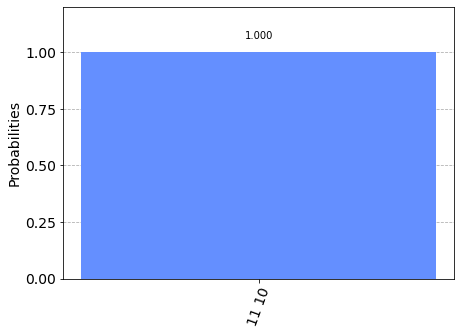

In [116]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2021-10-19 18:16:25,204: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'00 10': 5, '01 01': 1, '01 10': 58, '10 01': 1, '10 10': 24, '10 11': 2, '11 00': 24, '11 01': 2, '11 10': 883, '11 11': 24}


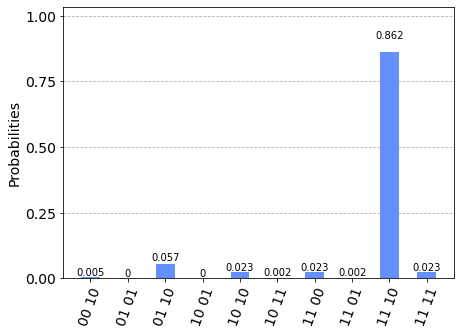

In [105]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')
qcomp = provider.get_backend('ibmq_santiago')
shots = 1024
job = execute(circuit, backend = qcomp, shots = shots)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

print(counts)

plot_histogram(counts)

In [106]:
correct_result = counts[message]
accuracy = (correct_result/shots)*100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 86.23%
